In [1]:
library(ggplot2)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


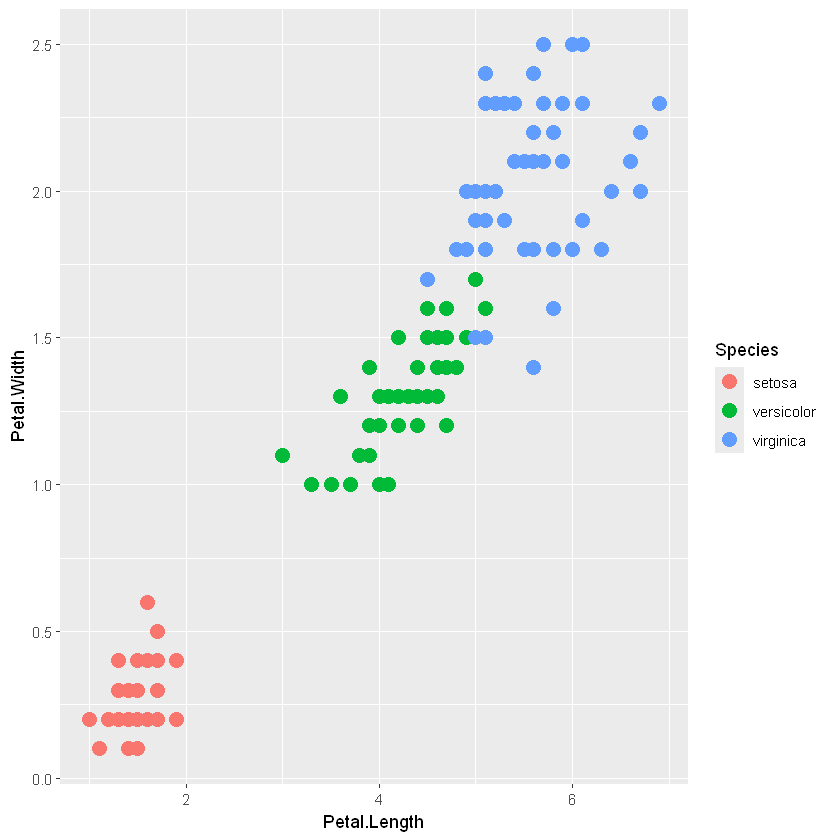

In [3]:
ggplot(iris, aes(Petal.Length, Petal.Width)) + geom_point(aes(col=Species), size=4)

In [4]:
#Performing k-means clustering
set.seed(100)
irisCluster <- kmeans(iris[,1:4], center=3, nstart=20)
irisCluster

K-means clustering with 3 clusters of sizes 62, 38, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     6.850000    3.073684     5.742105    2.071053
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 39.82097 23.87947 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

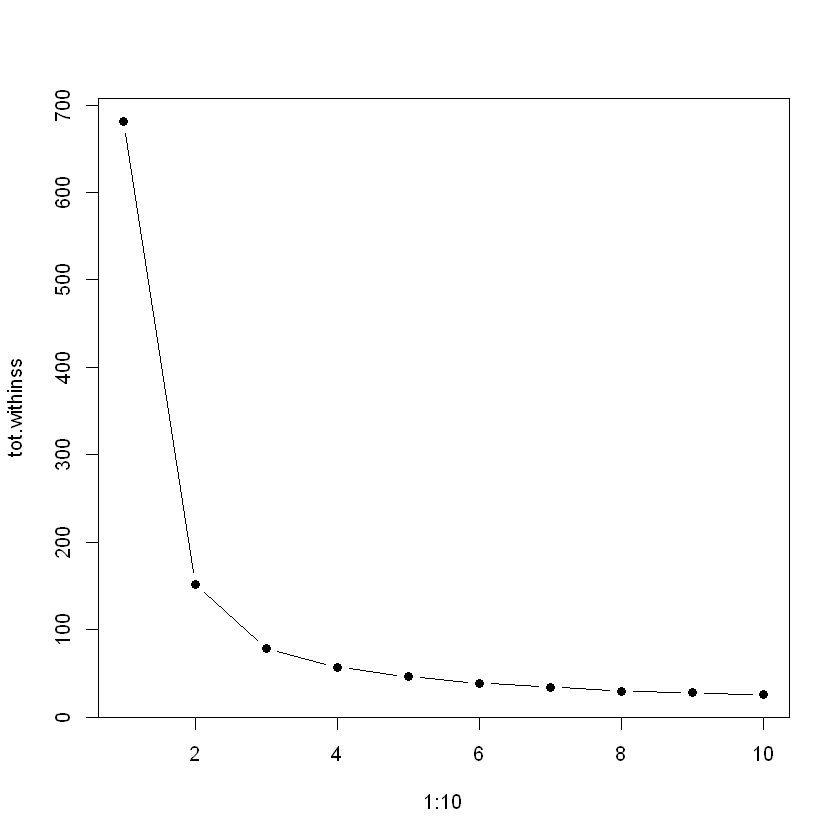

In [6]:
#Finding out the ideal value for k
tot.withinss <- vector(mode="character", length=10)
for (i in 1:10){
irisCluster <- kmeans(iris[,1:4], center=i, nstart=20)
tot.withinss[i] <- irisCluster$tot.withinss
}
#Let’s visualise the plot of tot.withinss for different k values.
plot(1:10, tot.withinss, type="b", pch=19)

In [7]:
#Comparing the predicted clusters with the original data.
irisCluster <- kmeans(iris[,1:4], center=3, nstart=20)
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36

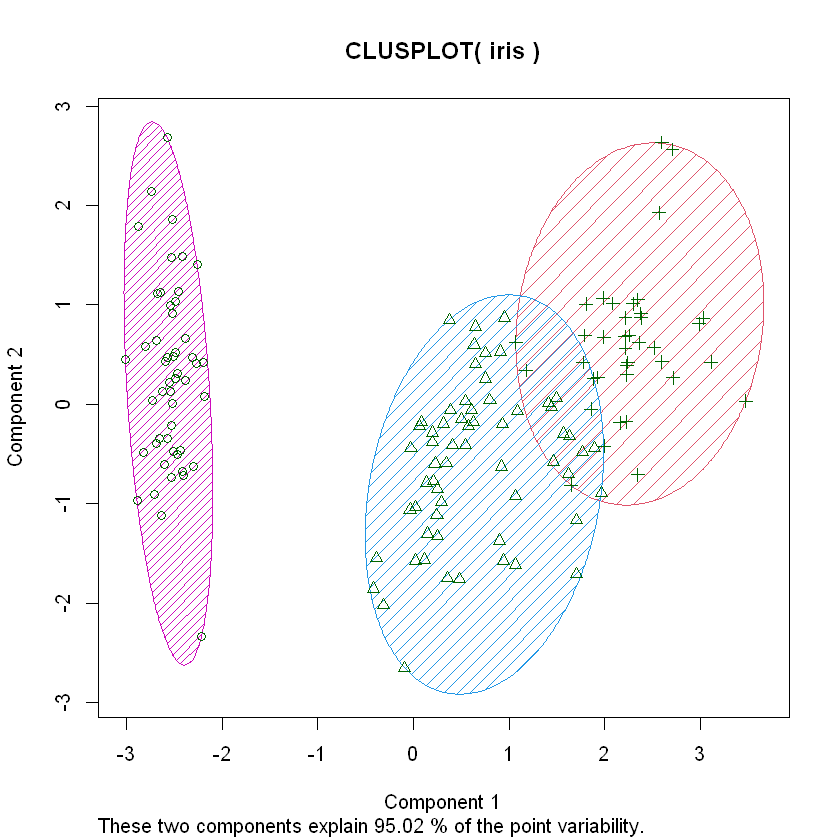

In [8]:
#We can also plot the predicted clusters as follows.
library(cluster)
clusplot(iris, irisCluster$cluster, color=T, shade=T, labels=0, lines=0)